## Analisis de Ventas

In [ ]:
import pandas as pd

In [ ]:
ventas = pd.read_csv('ventas.csv', sep=';')

In [ ]:
ventas.head()

,Mes,Ventas
0,01-jan-2017,266.0
1,01-feb-2017,145.9
2,01-mar-2017,183.1
3,01-apr-2017,119.3
4,01-may-2017,180.3


In [ ]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mes     36 non-null     object 
 1   Ventas  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [ ]:
ventas['Mes'] = pd.to_datetime(ventas['Mes'])

In [ ]:
ventas.head()

,Mes,Ventas
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [ ]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mes     36 non-null     datetime64[ns]
 1   Ventas  36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [ ]:
import seaborn as sns

In [ ]:
sns.__version__

'0.11.1'

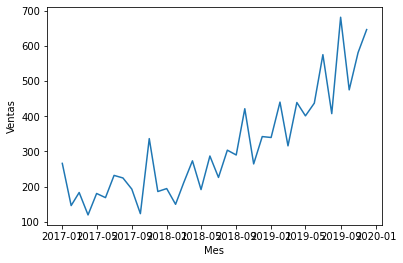

In [ ]:
sns.lineplot(x='Mes', y='Ventas', data=ventas)

In [ ]:
def grafico(titulo, x, y, xlabel, ylabel):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=ventas)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax = ax

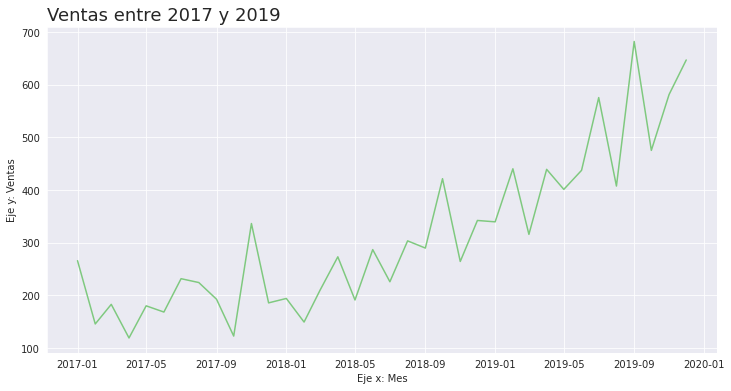

In [ ]:
grafico('Ventas entre 2017 y 2019', 'Mes', 'Ventas', 'Eje x: Mes', 'Eje y: Ventas')

## Descomposición de series temporales

In [ ]:
ventas.head()

,Mes,Ventas
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [ ]:
ventas['Variacion'] = ventas['Ventas'].diff()
ventas.head()

,Mes,Ventas,Variacion
0,2017-01-01,266.0,NaN
1,2017-02-01,145.9,-120.1
2,2017-03-01,183.1,37.2
3,2017-04-01,119.3,-63.8
4,2017-05-01,180.3,61.0


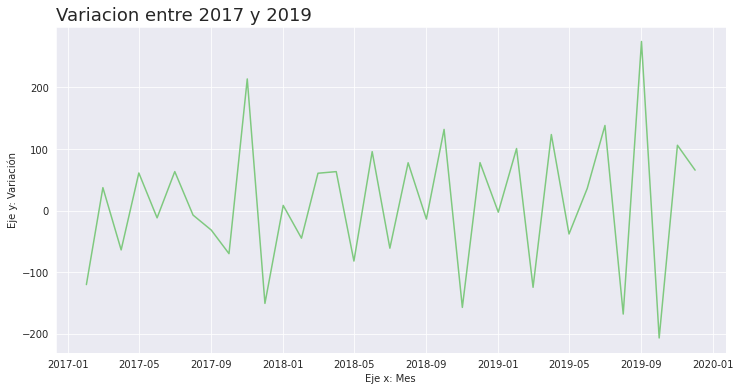

In [ ]:
grafico('Variacion entre 2017 y 2019', 'Mes', 'Variacion', 'Eje x: Mes', 'Eje y: Variación')

In [ ]:
ventas['Aceleracion'] = ventas['Variacion'].diff()
ventas.head()

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


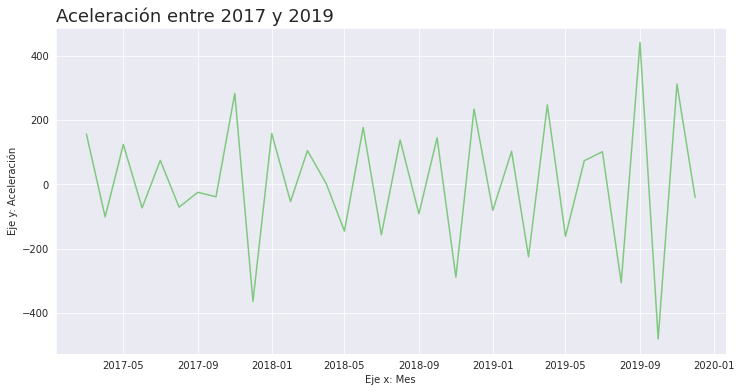

In [ ]:
grafico('Aceleración entre 2017 y 2019', 'Mes', 'Aceleracion', 'Eje x: Mes', 'Eje y: Aceleración')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def comparacion_grafico(titulo, dataset, x, y1, y2, y3):
    plt.figure(figsize=(16,11))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, loc='left', fontsize=18)
    sns.lineplot(x=x, y= y1, data= dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y= y2, data= dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y= y3, data= dataset)
    ax = ax

In [ ]:
ventas.head()

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


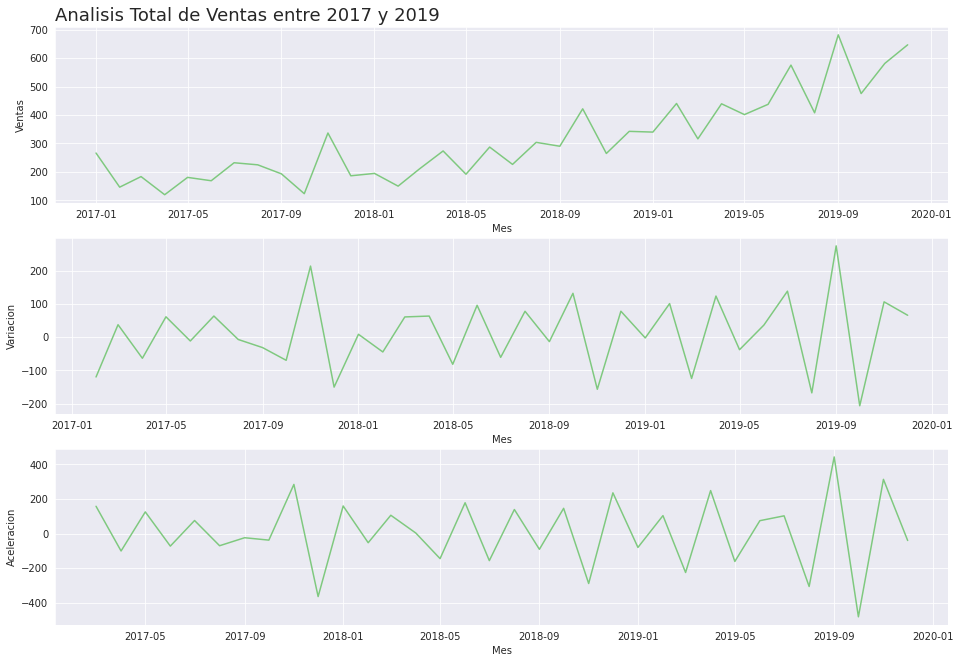

In [ ]:
comparacion_grafico('Analisis Total de Ventas entre 2017 y 2019', ventas, 'Mes', 'Ventas', 'Variacion', 'Aceleracion')

## Autocorrelación

In [ ]:
from pandas.plotting import autocorrelation_plot

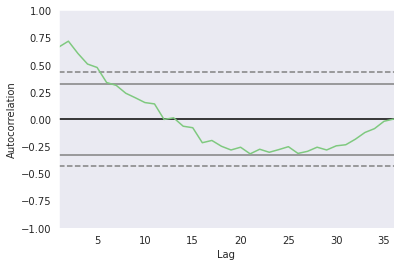

In [ ]:
autocorrelation_plot(ventas['Ventas']);